In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True #This setting enables automatic layout adjustment for figures, potentially improving the appearance and readability of plots and images generated by matplotlib. It ensures that the plot elements are nicely fitted within the figure window, preventing overlapping or clipping

In [4]:
#scale the pixel values of an image to a range of 0 to 255
def scale_image(input_img):
    input_img = input_img / np.max(input_img) #normalizes the image data, ensuring that all values fall between 0 and 1
    input_img = (input_img*255).astype('int') #scales the pixel values to the desired range of 0 to 255 and converts them to integers
    return input_img


def plot_results(input_img, output_img, x_values, y_values, save_as):

    # plotting the graph
    plt.figure(figsize = (36,12))

    plt.subplot(131)
    plt.imshow(input_img)
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(132)
    plt.plot(x_values, y_values)
    plt.xlabel('Input Pixels')
    plt.ylabel('Output Pixels')
    plt.grid(True)

    plt.subplot(133)
    plt.imshow(output_img)
    plt.title('Transformed Image')
    plt.axis('off')

    plt.savefig(save_as + '.png')

In [5]:
spine_img = cv2.imread('/content/drive/MyDrive/CV & IP/images/Fig0308(a)(fractured_spine).tif')

(-0.5, 745.5, 975.5, -0.5)

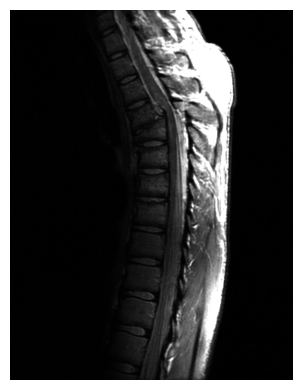

In [7]:
plt.figure(figsize = (8,4))
plt.imshow(spine_img)
plt.axis('off')

In [9]:
def gammaTransform(r, gamma, c=1):
    s = c* (r**gamma) #r^gamma
    return s

##Trying with gamma < 1

In [10]:
img_gamma = gammaTransform(spine_img, 0.4)
img_gamma_scaled = scale_image(img_gamma)

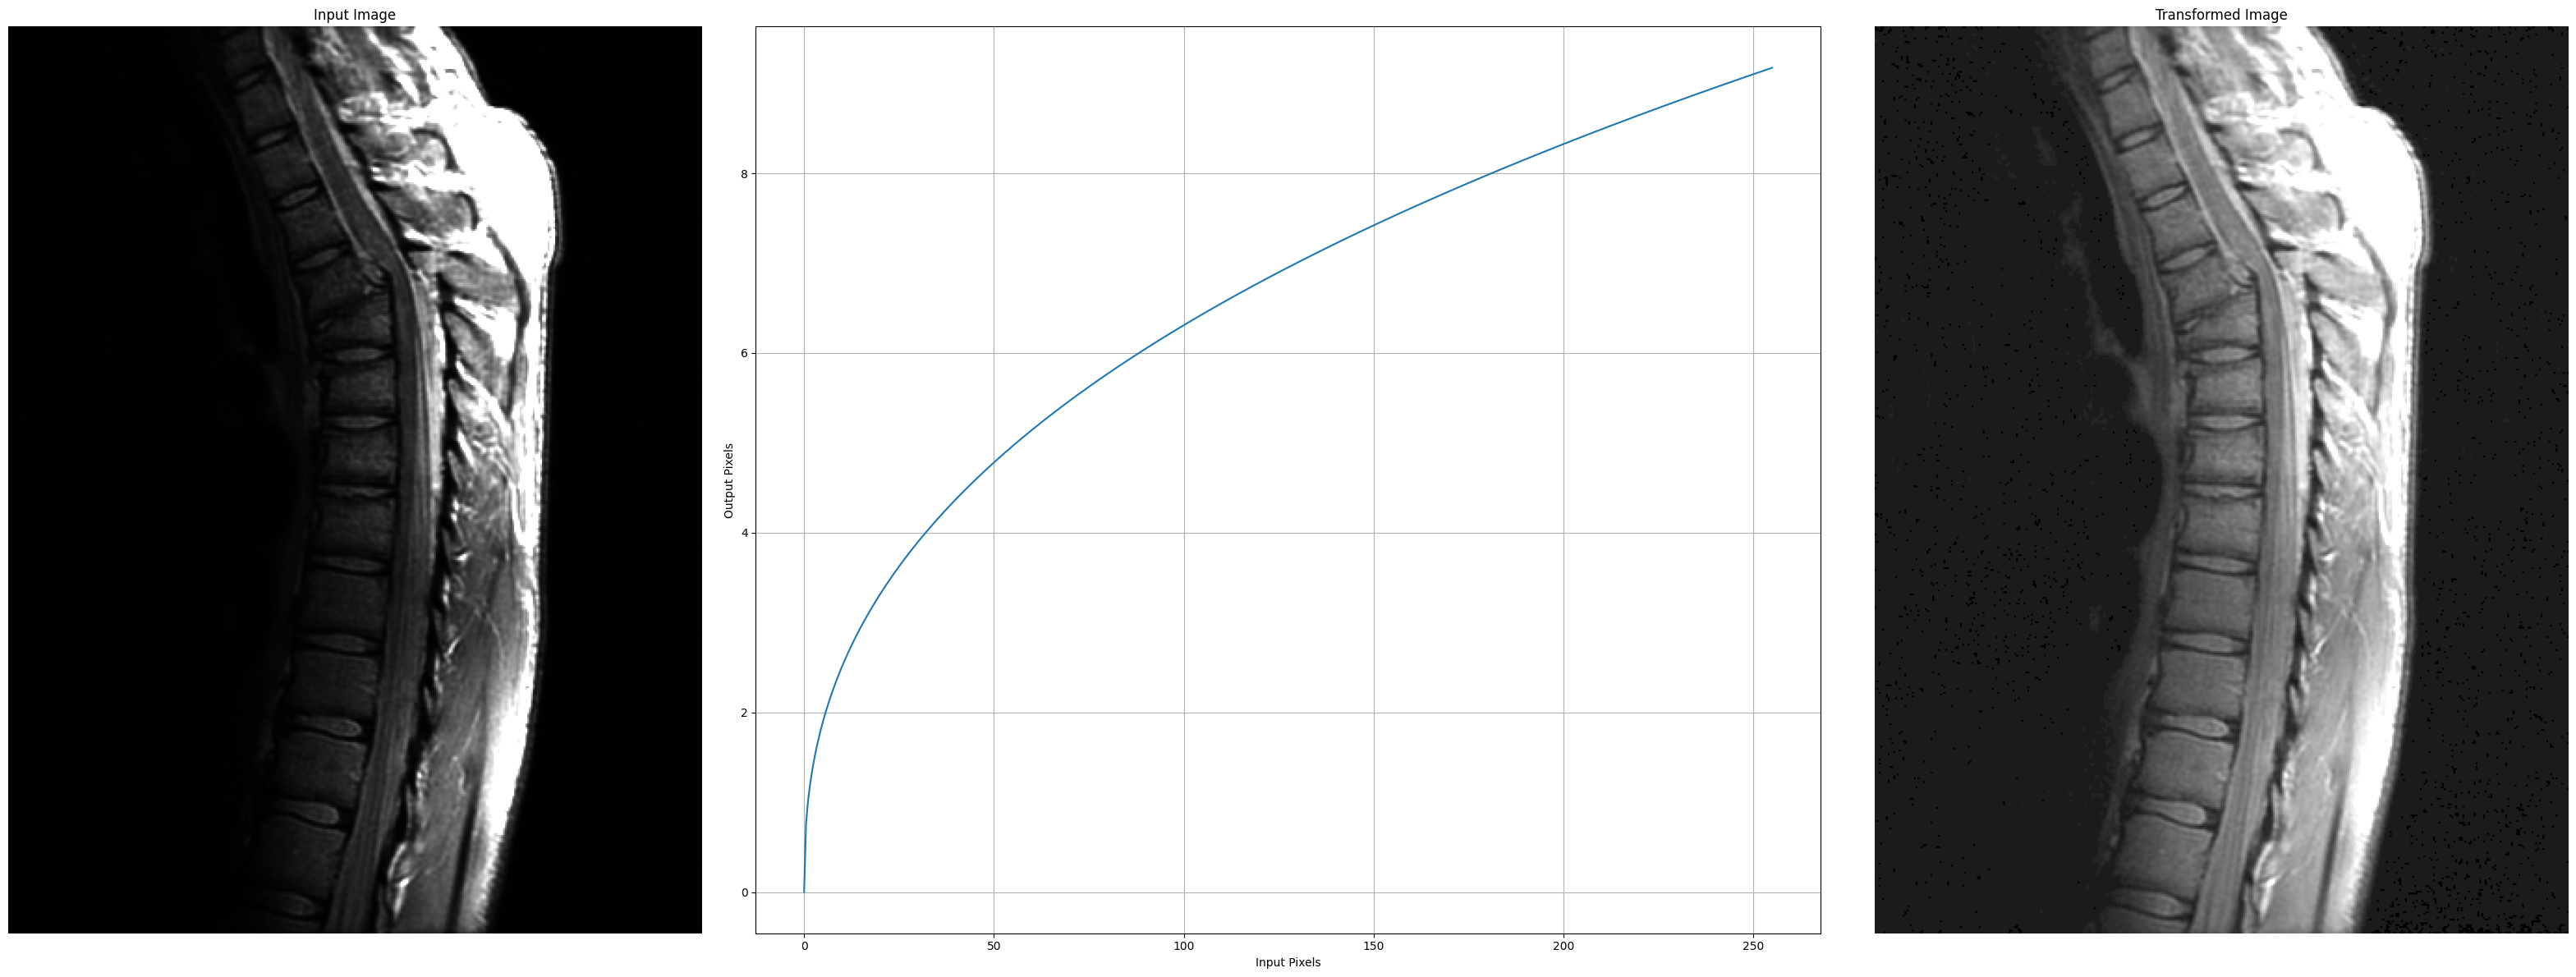

In [11]:
# required for plotting
x_values = np.linspace(0,255,500)
y_values = gammaTransform(x_values, 0.4)

plot_results(spine_img, img_gamma_scaled, x_values, y_values, 'gamma_0_4')

In [12]:
# defing a func to do gamma transform
def performGammaTransform(input_img, gammaValue):
        img_gamma = gammaTransform(input_img, gammaValue)
        img_gamma_scaled = scale_image(img_gamma)

        # required for plotting
        x_values = np.linspace(0,255,500)
        y_values = gammaTransform(x_values, gammaValue)

        plot_results(input_img,img_gamma_scaled, x_values, y_values,"gamma" + str(gammaValue))

        return img_gamma_scaled

In [13]:
final_images = []

for gammaValue in [0.6, 0.4, 0.3]:
    final_images.append(performGammaTransform(spine_img, gammaValue))

Output hidden; open in https://colab.research.google.com to view.

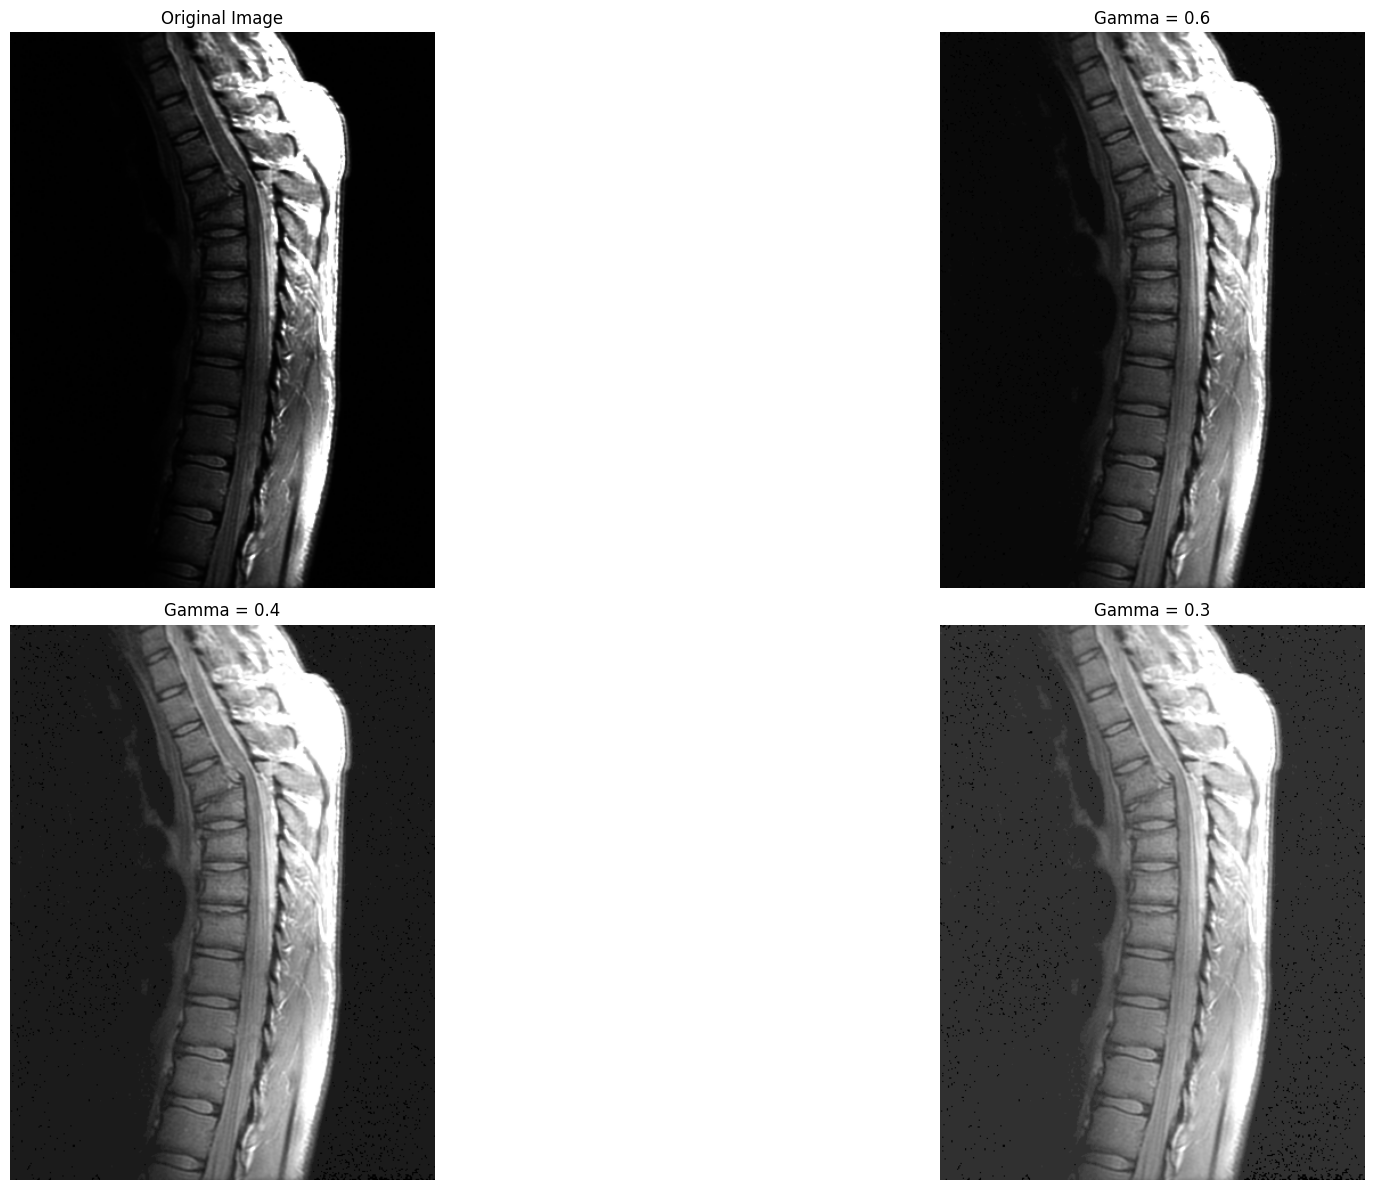

In [14]:
#Comparing the outputs

plt.figure(figsize = (24,12))

plt.subplot(221)
plt.imshow(spine_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(final_images[0])
plt.title('Gamma = 0.6')
plt.axis('off')

plt.subplot(223)
plt.imshow(final_images[1])
plt.title("Gamma = 0.4")
plt.axis('off')

plt.subplot(224)
plt.imshow(final_images[2])
plt.title("Gamma = 0.3")
plt.axis('off')

plt.tight_layout()
plt.savefig('gamma.png')

##with gamma > 1

In [15]:
arial_img = cv2.imread('/content/drive/MyDrive/CV & IP/images/Fig0309(a)(washed_out_aerial_image).tif')

(-0.5, 764.5, 768.5, -0.5)

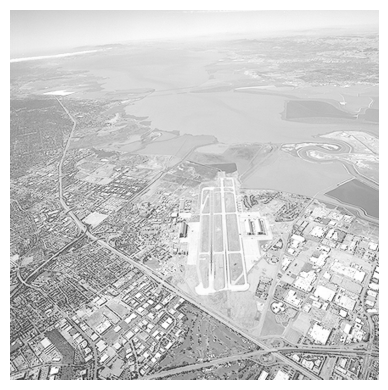

In [17]:
plt.figure(figsize = (8,4))
plt.imshow(arial_img)
plt.axis('off')

In [18]:
final_images_arial = []

for gammaValue in [3.0, 4.0, 5.0]:
    final_images_arial.append(performGammaTransform(arial_img, gammaValue))

Output hidden; open in https://colab.research.google.com to view.

In [20]:
#Comparing the output
plt.figure(figsize = (24,12))

plt.subplot(221)
plt.imshow(arial_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(final_images_arial[0])
plt.title('Gamma = 3.0')
plt.axis('off')

plt.subplot(223)
plt.imshow(final_images_arial[1])
plt.title("Gamma = 4.0")
plt.axis('off')

plt.subplot(224)
plt.imshow(final_images_arial[2])
plt.title("Gamma = 5.0")
plt.axis('off')

plt.tight_layout()
plt.savefig('gamma_arial.png')

Output hidden; open in https://colab.research.google.com to view.